# Tutorial for NEON hyperspectral h5 data  

https://www.neonscience.org/resources/learning-hub/tutorials/neon-aop-hdf5-py

In [1]:
# Need these packages for write_cog function
#!pip install rio-cogeo==2.3.1
#!pip install rio-tiler==2.1.4

In [2]:
import numpy as np
import h5py
import osgeo
from osgeo import gdal, osr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob
from glob import glob
import sys, os
sys.path.append('/home/pmontesa/code/icesat2_boreal/lib')
import rasterio as rio 

In [3]:
maindir = '/explore/nobackup/projects/ilab/data/AGB/Airborne_Hyperspectral/DP3.30006.001/neon-aop-products/2021/FullSite/D02/2021_SERC_5/L3/Spectrometer/Reflectance'
h5_fn_list = glob(maindir + '/*.h5')

In [4]:
len(h5_fn_list)
fn = h5_fn_list[50]

In [5]:
f = h5py.File(fn,'r')

#list_dataset lists the names of datasets in an hdf5 file
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)

f.visititems(list_dataset)

SERC/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
SERC/Reflectance/Metadata/Ancillary_Imagery/Aspect
SERC/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
SERC/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
SERC/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
SERC/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Path_Length
SERC/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
SERC/Reflectance/Metadata/Ancillary_Imagery/Slope
SERC/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
SERC/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
SERC/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
SERC/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
SERC/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
SERC/Reflectance/Metadata/Coordinate_System/EPSG C

In [6]:
#ls_dataset displays the name, shape, and type of datasets in hdf5 file
def ls_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(node)
    
f.visititems(ls_dataset)

<HDF5 dataset "Aerosol_Optical_Depth": shape (1000, 1000), type "<i2">
<HDF5 dataset "Aspect": shape (1000, 1000), type "<f4">
<HDF5 dataset "Cast_Shadow": shape (1000, 1000), type "|u1">
<HDF5 dataset "Dark_Dense_Vegetation_Classification": shape (1000, 1000), type "|u1">
<HDF5 dataset "Data_Selection_Index": shape (1000, 1000), type "<i4">
<HDF5 dataset "Haze_Cloud_Water_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Illumination_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Path_Length": shape (1000, 1000), type "<f4">
<HDF5 dataset "Sky_View_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Slope": shape (1000, 1000), type "<f4">
<HDF5 dataset "Smooth_Surface_Elevation": shape (1000, 1000), type "<f4">
<HDF5 dataset "Visibility_Index_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Water_Vapor_Column": shape (1000, 1000), type "<f4">
<HDF5 dataset "Weather_Quality_Indicator": shape (1000, 1000, 3), type "|u1">
<HDF5 dataset "Coordinate_System_String": shap

In [7]:
serc_refl = f['SERC']['Reflectance']
print(serc_refl)

<HDF5 group "/SERC/Reflectance" (2 members)>


In [8]:
serc_reflArray = serc_refl['Reflectance_Data']
print(serc_reflArray)

<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">


In [9]:
refl_shape = serc_reflArray.shape
print('SERC Reflectance Data Dimensions:',refl_shape)

SERC Reflectance Data Dimensions: (1000, 1000, 426)


In [10]:
#View wavelength information and values

wavelengths = serc_refl['Metadata']['Spectral_Data']['Wavelength']
print(wavelengths)
# print(wavelengths.value)
# Display min & max wavelengths
print('min wavelength:', np.amin(wavelengths),'nm')
print('max wavelength:', np.amax(wavelengths),'nm')

#show the band width 
print('band width =',(wavelengths[1]-wavelengths[0]),'nm')
print('band width =',(wavelengths[-1]-wavelengths[-2]),'nm')

<HDF5 dataset "Wavelength": shape (426,), type "<f4">
min wavelength: 383.884 nm
max wavelength: 2512.1804 nm
band width = 5.0076904 nm
band width = 5.0078125 nm


In [11]:
serc_refl['Metadata']['Coordinate_System'].visititems(ls_dataset)

<HDF5 dataset "Coordinate_System_String": shape (), type "|O">
<HDF5 dataset "EPSG Code": shape (), type "|O">
<HDF5 dataset "Map_Info": shape (), type "|O">
<HDF5 dataset "Proj4": shape (), type "|O">


In [12]:
prj4 = serc_refl['Metadata']['Coordinate_System']['Proj4']
prj4_str = prj4[()].decode("utf-8")
prj4_str

'+proj=UTM +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

In [13]:
serc_mapInfo = serc_refl['Metadata']['Coordinate_System']['Map_Info']
print('SERC Map Info:\n',serc_mapInfo)
print('\n',serc_mapInfo[()])
mapInfo_split  = str(serc_mapInfo[()]).split(',')
mapInfo_split

SERC Map Info:
 <HDF5 dataset "Map_Info": shape (), type "|O">

 b'UTM,  1.000,  1.000,       366000.00,       4305000.0,       1.0000000,       1.0000000,  18,  North,  WGS-84,  units=Meters, 0'


["b'UTM",
 '  1.000',
 '  1.000',
 '       366000.00',
 '       4305000.0',
 '       1.0000000',
 '       1.0000000',
 '  18',
 '  North',
 '  WGS-84',
 '  units=Meters',
 " 0'"]

In [14]:
#Extract the resolution & convert to floating decimal number
res = float(mapInfo_split[5]),float(mapInfo_split[6])
print('Resolution:',res)

#Extract the upper left-hand corner coordinates from mapInfo
xMin = float(mapInfo_split[3]) 
yMax = float(mapInfo_split[4])
#Calculate the xMax and yMin values from the dimensions
#xMax = left corner + (# of columns * resolution)
xMax = xMin + (refl_shape[1]*res[0])
yMin = yMax - (refl_shape[0]*res[1]) 

# print('xMin:',xMin) ; print('xMax:',xMax) 
# print('yMin:',yMin) ; print('yMax:',yMax) 
serc_ext = (xMin, xMax, yMin, yMax)
print('serc_ext:',serc_ext)

#Can also create a dictionary of extent:
serc_extDict = {}
serc_extDict['xMin'] = xMin
serc_extDict['xMax'] = xMax
serc_extDict['yMin'] = yMin
serc_extDict['yMax'] = yMax
print('serc_extDict:',serc_extDict)

Resolution: (1.0, 1.0)
serc_ext: (366000.0, 367000.0, 4304000.0, 4305000.0)
serc_extDict: {'xMin': 366000.0, 'xMax': 367000.0, 'yMin': 4304000.0, 'yMax': 4305000.0}


In [15]:
print('b56 wavelngth:',wavelengths[56],"nanometers")
b56 = serc_reflArray[:,:,55].astype(np.float)
print('b56 type:',type(b56))
print('b56 shape:',b56.shape)
print('Band 56 Reflectance:\n',b56)
# plt.hist(b56.flatten())

b56 wavelngth: 664.3183 nanometers
b56 type: <class 'numpy.ndarray'>
b56 shape: (1000, 1000)
Band 56 Reflectance:
 [[ 262.  268.  263. ...  251.  247.  252.]
 [ 261.  257.  264. ...  257.  251.  247.]
 [ 272.  267.  266. ...  254.  248.  258.]
 ...
 [  57.   39.   35. ...  686.  670. 1510.]
 [  51.   36.   32. ...  686.  642.  689.]
 [  50.   36.   35. ...  692.  678.  680.]]


In [16]:
#View and apply scale factor and data ignore value
scaleFactor = serc_reflArray.attrs['Scale_Factor']
noDataValue = serc_reflArray.attrs['Data_Ignore_Value']
print('Scale Factor:',scaleFactor)
print('Data Ignore Value:',noDataValue)

b56[b56==int(noDataValue)]=np.nan
b56 = b56/scaleFactor
print('Cleaned Band 56 Reflectance:\n',b56)

Scale Factor: 10000.0
Data Ignore Value: -9999.0
Cleaned Band 56 Reflectance:
 [[0.0262 0.0268 0.0263 ... 0.0251 0.0247 0.0252]
 [0.0261 0.0257 0.0264 ... 0.0257 0.0251 0.0247]
 [0.0272 0.0267 0.0266 ... 0.0254 0.0248 0.0258]
 ...
 [0.0057 0.0039 0.0035 ... 0.0686 0.067  0.151 ]
 [0.0051 0.0036 0.0032 ... 0.0686 0.0642 0.0689]
 [0.005  0.0036 0.0035 ... 0.0692 0.0678 0.068 ]]


Text(0, 0.5, 'Frequency')

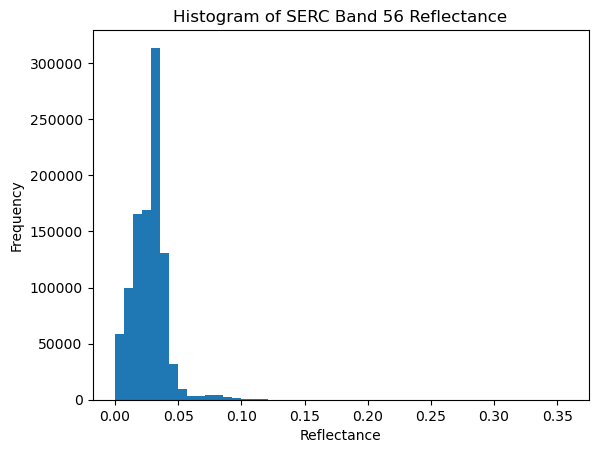

In [17]:
plt.hist(b56[~np.isnan(b56)],50);
plt.title('Histogram of SERC Band 56 Reflectance')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')

## Plot 1 band of the dataset

(0.0, 0.07)

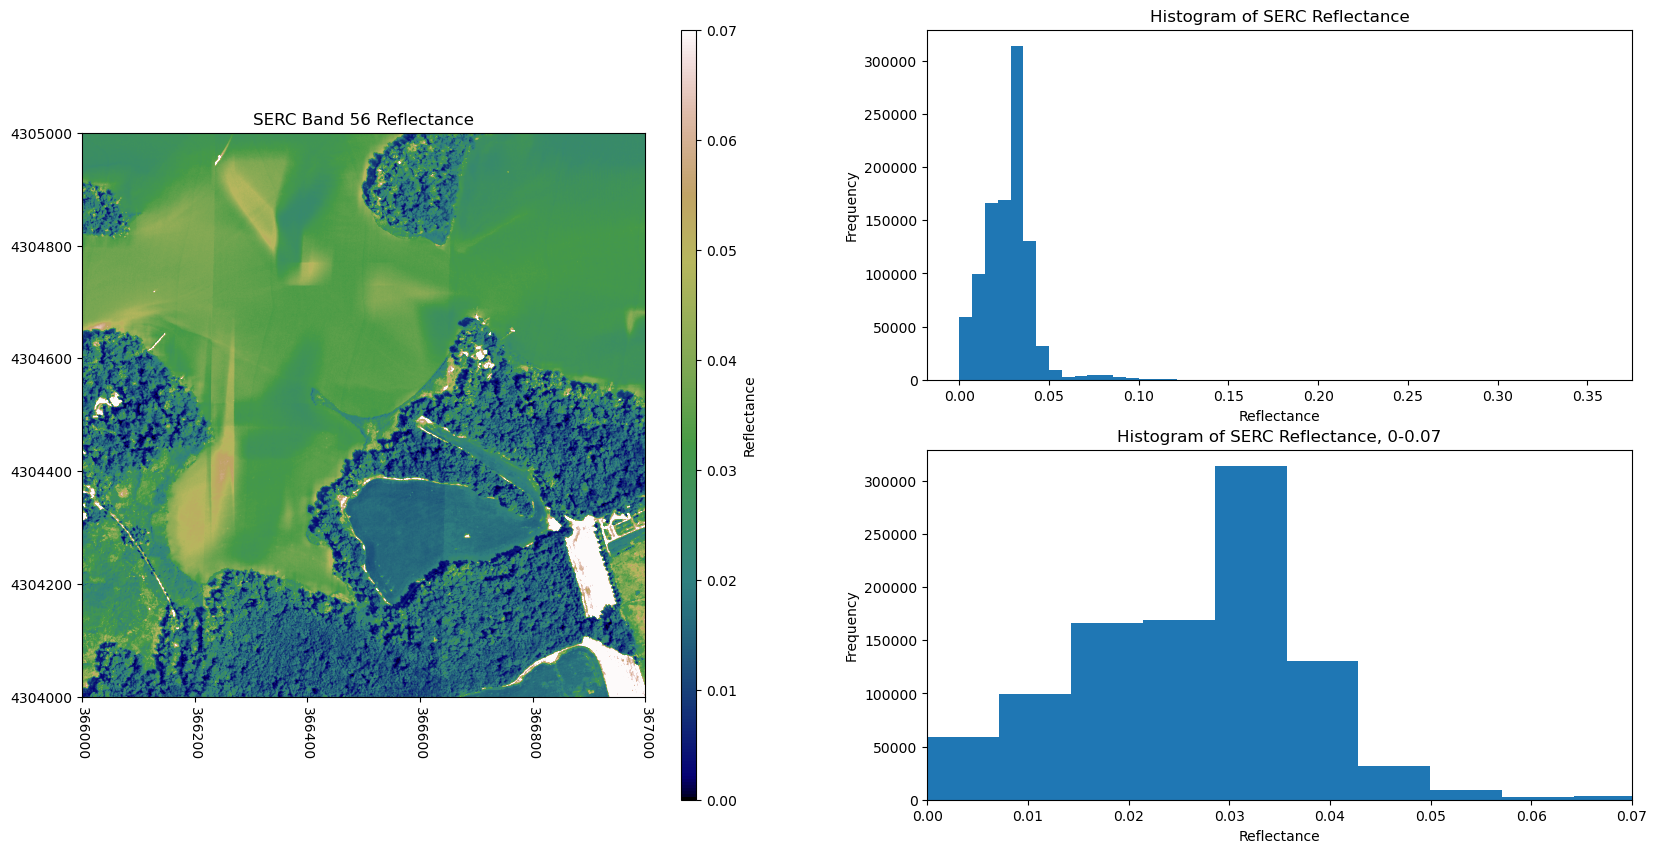

In [18]:
serc_fig = plt.figure(figsize=(20,10))
ax1 = serc_fig.add_subplot(1,2,1)
serc_plot = ax1.imshow(b56,extent=serc_ext,cmap='gist_earth',clim=(0,0.07)) 
#serc_plot = ax1.imshow(b56,extent=serc_ext,cmap='jet') 
cbar = plt.colorbar(serc_plot,aspect=50); cbar.set_label('Reflectance')
plt.title('SERC Band 56 Reflectance'); #ax = plt.gca(); 
ax1.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
rotatexlabels = plt.setp(ax1.get_xticklabels(),rotation=270) #rotate x tick labels 90 degree

#  plot histogram of reflectance values (with 50 bins)
ax2 = serc_fig.add_subplot(2,2,2)
ax2.hist(b56[~np.isnan(b56)],50); 
plt.title('Histogram of SERC Reflectance')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')

# plot histogram, zooming in on values < 0.1
ax3 = serc_fig.add_subplot(2,2,4)
ax3.hist(b56[~np.isnan(b56)],50); 
plt.title('Histogram of SERC Reflectance, 0-0.07')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')
ax3.set_xlim([0,0.07])

In [19]:
serc_extDict['xMin']

366000.0

In [20]:
def calc_clip_index(clipExtent, fullExtent, xscale=1, yscale=1):
    
    h5rows = fullExtent['yMax'] - fullExtent['yMin']
    h5cols = fullExtent['xMax'] - fullExtent['xMin']    
    
    indExtent = {}
    indExtent['xMin'] = round((clipExtent['xMin']-fullExtent['xMin'])/xscale)
    indExtent['xMax'] = round((clipExtent['xMax']-fullExtent['xMin'])/xscale)
    indExtent['yMax'] = round(h5rows - (clipExtent['yMin']-fullExtent['yMin'])/xscale)
    indExtent['yMin'] = round(h5rows - (clipExtent['yMax']-fullExtent['yMin'])/yscale)

    return indExtent

### Do a subset
a 200 x 200 pixel box starting from the lower left

In [21]:
print('SERC extent:',serc_extDict)

sub_sz = 200
clipExtent = {}
clipExtent['xMin'] = serc_extDict['xMin']
clipExtent['xMax'] = serc_extDict['xMin']+sub_sz
clipExtent['yMin'] = serc_extDict['yMin']
clipExtent['yMax'] = serc_extDict['yMin']+sub_sz
print('SERC Subset clip extent:',clipExtent)
serc_subInd = calc_clip_index(clipExtent,serc_extDict)
print('SERC Subset Index:',serc_subInd)

SERC extent: {'xMin': 366000.0, 'xMax': 367000.0, 'yMin': 4304000.0, 'yMax': 4305000.0}
SERC Subset clip extent: {'xMin': 366000.0, 'xMax': 366200.0, 'yMin': 4304000.0, 'yMax': 4304200.0}
SERC Subset Index: {'xMin': 0, 'xMax': 200, 'yMax': 1000, 'yMin': 800}


In [22]:
serc_subArray = serc_reflArray[serc_subInd['yMin']:serc_subInd['yMax'],serc_subInd['xMin']:serc_subInd['xMax'],:]
serc_subExt = (clipExtent['xMin'],clipExtent['xMax'],clipExtent['yMin'],clipExtent['yMax'])
print('SERC Reflectance Subset Dimensions:',serc_subArray.shape)

SERC Reflectance Subset Dimensions: (200, 200, 426)


In [23]:
serc_b56_subset = serc_subArray[:,:,55].astype(np.float)
serc_b56_subset[serc_b56_subset==int(noDataValue)]=np.nan
serc_b56_subset = serc_b56_subset/scaleFactor
#print(serc_b56_subset)

In [24]:
print('SERC Subsetted Band 56 Reflectance Stats:')
print('min reflectance:',np.nanmin(serc_b56_subset))
print('mean reflectance:',round(np.nanmean(serc_b56_subset),2))
print('max reflectance:',round(np.nanmax(serc_b56_subset),2))

SERC Subsetted Band 56 Reflectance Stats:
min reflectance: 0.0
mean reflectance: 0.02
max reflectance: 0.13


Text(0, 0.5, 'Frequency')

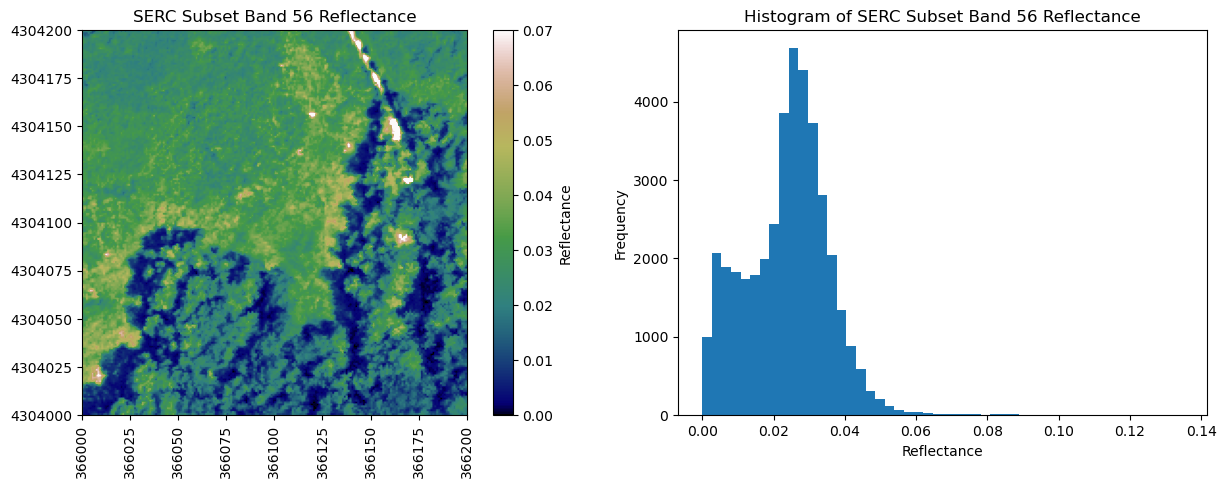

In [25]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
serc_subset_plot = plt.imshow(serc_b56_subset,extent=serc_subExt,cmap='gist_earth',clim=(0,0.07)) 
cbar = plt.colorbar(serc_subset_plot); cbar.set_label('Reflectance')
plt.title('SERC Subset Band 56 Reflectance'); 
ax1.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
rotatexlabels = plt.setp(ax1.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree

ax2 = fig.add_subplot(1,2,2)
plt.hist(serc_b56_subset[~np.isnan(serc_b56_subset)],50);
plt.title('Histogram of SERC Subset Band 56 Reflectance')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')

#### Write to geotiff using rasterio

In [26]:
clipExtent

{'xMin': 366000.0, 'xMax': 366200.0, 'yMin': 4304000.0, 'yMax': 4304200.0}

### Write with rasterio is buggy

TODO: get this working if needed

In [27]:
import rasterio
from rasterio.transform import from_origin

#arr = np.random.randint(5, size=(100,100)).astype(np.float)
arr = serc_b56_subset
print(arr.shape)

#origin is upper left
transform = from_origin(clipExtent['xMin'], clipExtent['yMax'], 0, 0)

# Set the profile for the in memory raster based on the ndarry stack
src_profile = dict(
        driver="GTiff",
        height=arr.shape[0],
        width=arr.shape[1],
        count=1,
        dtype=str(arr.dtype),
        crs=prj4_str,
        transform=src_transform,
        nodata=np.nan)

new_dataset = rasterio.open('/home/pmontesa/test3.tif', 'w', driver='GTiff',
                            height = arr.shape[0], width = arr.shape[1],
                            count=1, dtype=str(arr.dtype),
                            crs = prj4_str,
                            transform=transform)

new_dataset.write(arr, 1)
new_dataset.close()

(200, 200)


CRSError: The WKT could not be parsed. OGR Error code 5